# IOPS Comparison

In [1]:
%run 'common/plot_iops.py'

### IOPS - HP - 256GB - 15NS100WT9JW

In [2]:
plot_measurement_window_tabular('hp/iops/2')

---

### IOPS - RockPro64 - 256GB - 15NS100WT9JW

In [3]:
plot_measurement_window_tabular('rockpro64/iops/1')

---

### IOPS - RockPro64 - 256GB - 55MS101IT9JW

In [4]:
plot_measurement_window_tabular('rockpro64/iops/4')

---

### IOPS - RockPro64 - 128GB - 75AS1011T9HW

In [5]:
plot_measurement_window_tabular('rockpro64/iops/2')

---

### IOPS - RockPro64 - 128GB - 75AS1005T9HW

In [6]:
plot_measurement_window_tabular('rockpro64/iops/3')

---

In [7]:
from matplotlib.ticker import MultipleLocator

_DIR = 'dir'
_MARKER = 'marker'

def plot_iops_comp(profiles):
    block_sizes_chunk_length = 4

    for chunk_start in np.arange(0,
                                 len(BLOCK_SIZES),
                                 block_sizes_chunk_length):
        chunk_end = min(chunk_start + block_sizes_chunk_length, len(BLOCK_SIZES))
        _, ax = __create_subplots()

        platforms = []
        bars = []
        block_sizes_in_chunk = list(reversed(BLOCK_SIZES))[chunk_start:chunk_end]
        for plat, attrs in profiles.items():
            platforms.append(plat)
            dirname = attrs[_DIR]
            for bs in block_sizes_in_chunk:
                avg_values = []

                for rwmixread in RWMIXREADS:
                    _, values = __get_avg_iops(dirname, bs, rwmixread)
                    avg_values.append(np.mean(util.get_values_in_window(values)))

                bars.append(ax.errorbar(
                    [__get_rwmix_read2write(rwmixread) for rwmixread in RWMIXREADS],
                    avg_values,
                    fmt=attrs[_MARKER]))

            # reset the color cycle
            # https://stackoverflow.com/a/24283087
            ax.set_prop_cycle(None)

        ax.yaxis.set_minor_locator(MultipleLocator(1000))
        ax.grid(which='major', alpha=0.5)
        ax.grid(which='minor', alpha=0.2)

        ax.set_ylabel('IOPS')
        ax.set_xlabel('R/W Mix %')

        ax.add_artist(plt.legend(
            bars[:len(block_sizes_in_chunk)],
            block_sizes_in_chunk,
            ncol=block_sizes_chunk_length,
            loc=8,
            bbox_to_anchor=(0.5, 1),
            frameon=False))
        plt.legend(bars[::block_sizes_chunk_length],
                   platforms,
                   prop={'size': 8})

        plt.title('IOPS Comparison - ' + platforms[0] + ' vs. ' + platforms[1], y=1.12)
        plt.show()

### HP vs. RockPro64

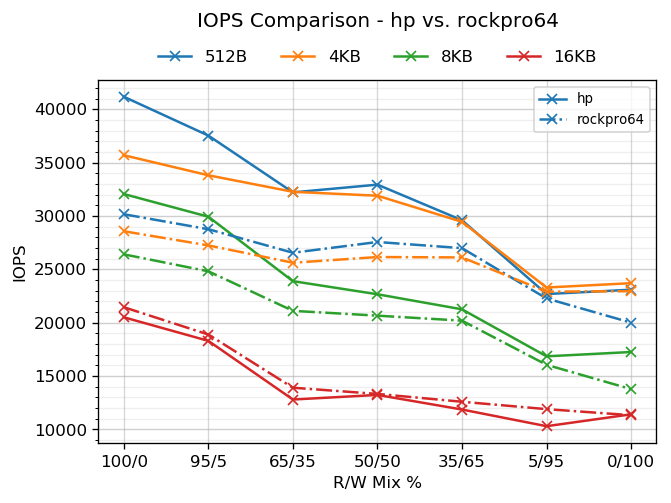

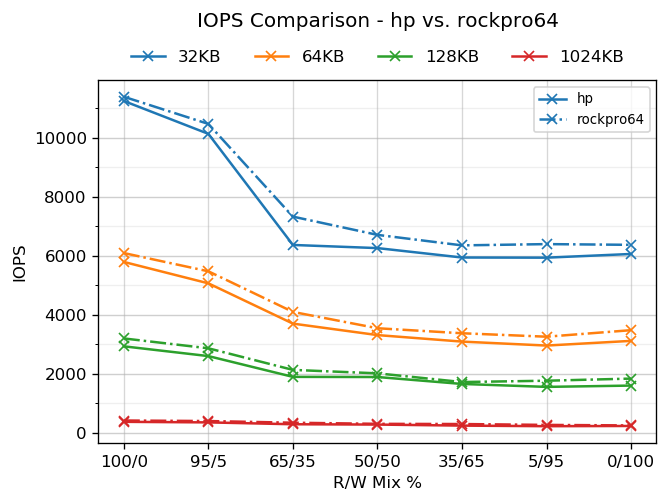

In [8]:
plot_iops_comp({
    'hp':        {_DIR: 'hp/iops/2',
                  _MARKER: '-x'},
    'rockpro64': {_DIR: 'rockpro64/iops/1',
                  _MARKER: '-.x'}
})

All the numbers from these two test platforms do not suffer from CPU performance limitation.

---
### Verification Comparison for Results from **RockPro64**

#### 256GB-15NS100WT9JW vs. 128GB-75AS1011T9HW

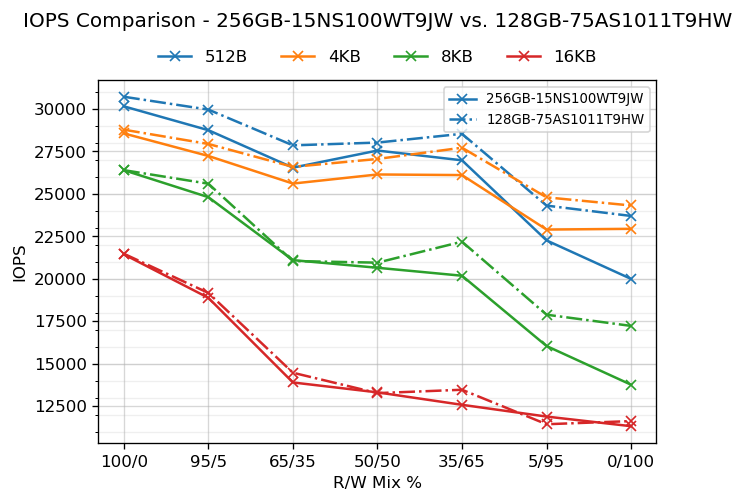

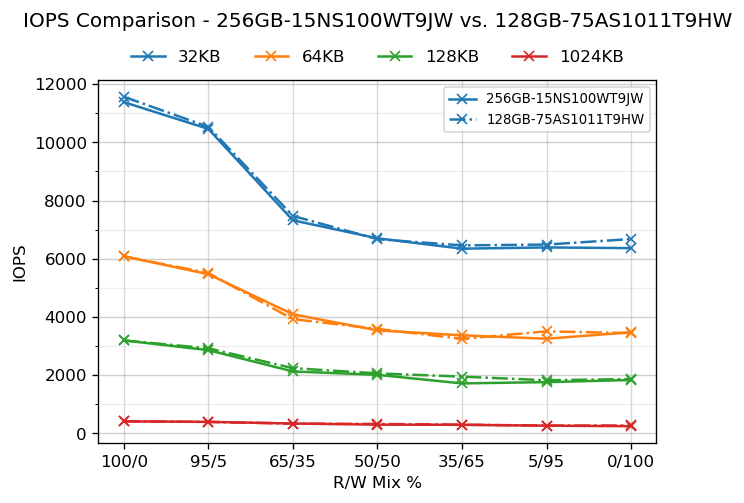

In [9]:
plot_iops_comp({
    '256GB-15NS100WT9JW': {_DIR: 'rockpro64/iops/1',
                           _MARKER: '-x'},
    '128GB-75AS1011T9HW': {_DIR: 'rockpro64/iops/2',
                           _MARKER: '-.x'}
})

This is where we see the IOPS differences on these two drives. As the write percentage increase and the block size decreases, the more observable differences we can see. Again, no CPU performance limitation is observed for all tests.

#### 128GB-75AS1011T9HW vs. 128GB-75AS1005T9HW

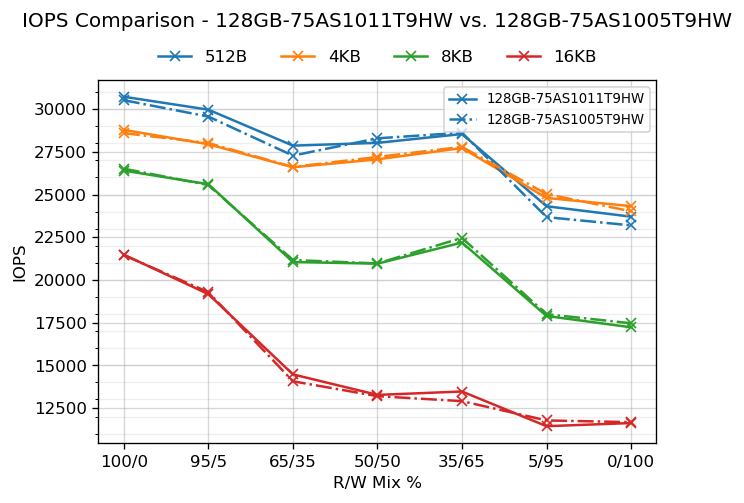

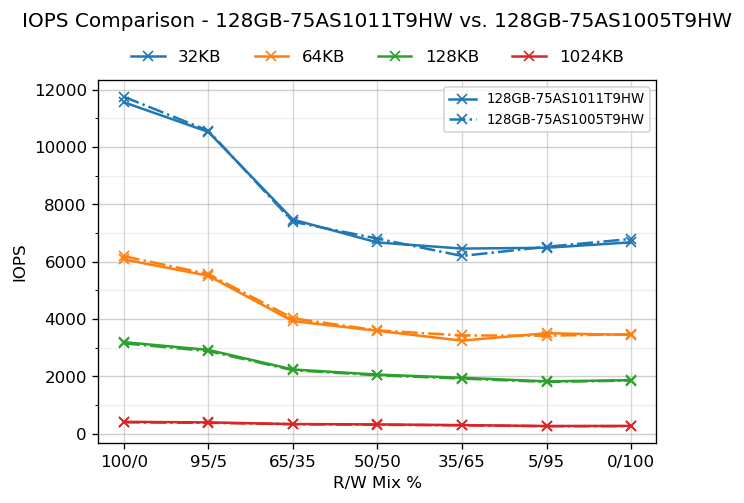

In [10]:
plot_iops_comp({
    '128GB-75AS1011T9HW': {_DIR: 'rockpro64/iops/2',
                           _MARKER: '-x'},
    '128GB-75AS1005T9HW': {_DIR: 'rockpro64/iops/3',
                           _MARKER: '-.x'}
})

The two identical SSD drives are expected to have the same IOPS values under the same tests, and they do.

#### 256GB-15NS100WT9JW vs. 256GB-55MS101IT9JW

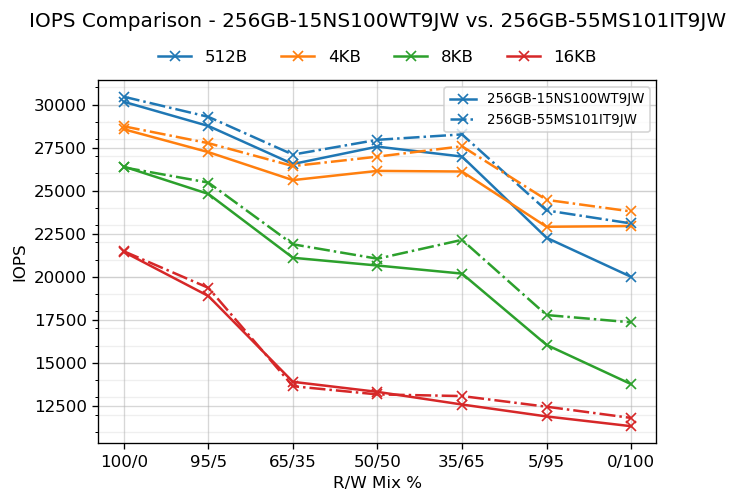

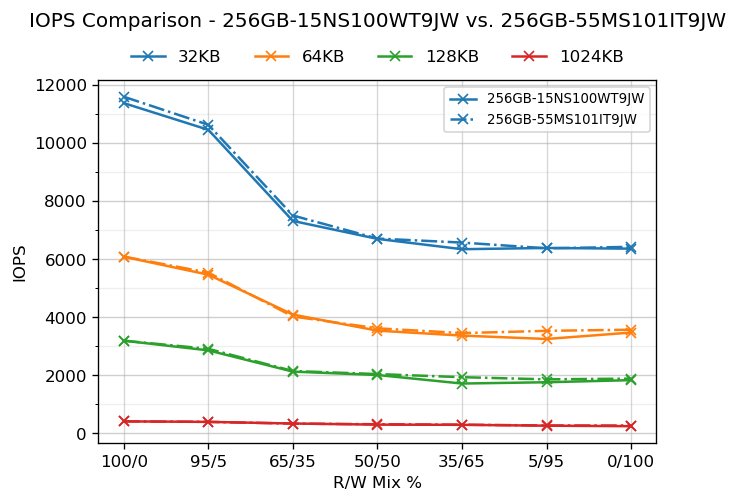

In [11]:
plot_iops_comp({
    '256GB-15NS100WT9JW': {_DIR: 'rockpro64/iops/1',
                           _MARKER: '-x'},
    '256GB-55MS101IT9JW': {_DIR: 'rockpro64/iops/4',
                           _MARKER: '-.x'}
})